# Laboratorio 2

------------

María Marta Ramirez Gil  21342                                   
Gustavo Andrés Gonzalez Pineda 21438  
Diego Leiva
Jose Pablo Orellana

Inteligencia Artificial                                                   
Universidad del Valle de Guatemala

------------

## Task 3

Importacion de librerias necesarias

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Abrir y definir el dataset

In [2]:
df = pd.read_csv("LolDataSet.csv", sep=",")

Vista del dataset

In [6]:
n = int(input("ingrese el numero de rows:"))
df.head(n)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Informacion del dataset

In [7]:
tipos_de_datos = df.dtypes
print(tipos_de_datos)


gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Encoding no necesario ya que la variable objetivo `blueWins` ya esta codificada como 1 para vistoria y 0 para derrota. Y no se necesecita para las demás variables.

Revisión de balanceo del dataset

blueWins
0    4949
1    4930
Name: count, dtype: int64


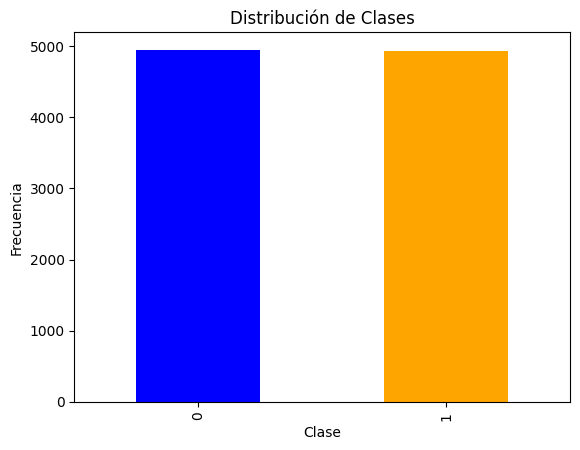

blueWins
0    50.096164
1    49.903836
Name: proportion, dtype: float64


In [11]:
class_distribution = df['blueWins'].value_counts()
print(class_distribution)

df['blueWins'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

class_percentage = df['blueWins'].value_counts(normalize=True) * 100
print(class_percentage)

Debido al modelo que se usara, las variables se ven bastante equilibradas y no se considera estrictamente necesario realizar un balanceo.

Escalar variables

In [14]:
variables_toScale = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists',
                     'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
                     'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin',
                     'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths',
                     'redAssists', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled',
                     'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin',
                     'redGoldPerMin']

scaler = StandardScaler()

# Escalar las variables numericas
df[variables_toScale] = scaler.fit_transform(df[variables_toScale])

In [16]:
df.head(2)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,0.316996,-0.379275,1,0.935301,-0.046926,1.071495,0,0,...,0,0.052293,-0.410475,-0.763215,-0.928741,0.367685,-0.256228,-0.013342,-0.928741,0.052293
1,4523371949,0,-0.570992,-0.839069,0,-0.393216,-0.387796,-0.404768,0,0,...,1,0.758619,-0.410475,-0.436980,1.033784,0.068504,1.191254,0.593342,1.033784,0.758619
